In [83]:
import pickle
import time
import copy
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras.datasets.mnist import load_data
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import pyplot as plt
%matplotlib inline

In [55]:
def read_txt(filename):
    f = open(filename, "r")
    lines = f.readlines()
    f.close()
    for i in range(len(lines)):
        lines[i] = float(lines[i].rstrip('\n'))
    return lines

def data_reshape(x):
    x = (x.reshape(len(x), 28 * 28)).astype(np.float64)
    x /= x.max()
    return x

def plot_data(data_list, data_name):
    activation_function_list = ['tanh', 'relu', 'logistic']
    train_rate = np.arange(0.1, 1.1, 0.1)
    plt.grid()
    plt.xlabel("Training Rate")
    plt.ylabel(data_name)
    plt.xticks(train_rate)
    for i, function_name in enumerate(activation_function_list):
        plt.plot(train_rate, data_list[i], marker='.', label=function_name)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=14)
    plt.show()

def heat_map(filename, x_test, y_label):
    model = model_load(filename)
    start = time.time()
    predict = model.predict(x_test)
    duration = time.time() - start
#     print("Time[s]: ", duration)
    
    labels = copy.deepcopy(y_label)
    labels = sorted(list(set(labels)))
    cmx_data = confusion_matrix(y_label, predict, labels=labels)
#     print(cmx_data)
#     print( classification_report(yt, predict) )
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
#     print(df_cmx)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cmx, annot=True, fmt='2d', cmap='Reds', center=1100)
    plt.show()

def model_load(filename):
    return pickle.load(open(filename, 'rb'))

def wrong_image(filename, x_test, y_label):
    model = model_load(filename)
    predict = model.predict(x_test)
    predict = list(predict)

    wrong_list = []
    wrong_value = []
    correct_value = []
    for i in range(len(predict)):
        if predict[i] != y_label[i]:
            wrong_list.append(i)
            wrong_value.append(predict[i])
            correct_value.append(y_label[i])

    plt.figure(figsize=(20,60))
    for i in range(len(correct_value)):
        ax = plt.subplot(30, 8, i + 1)
        ax.set_axis_off()
        ax.set_title( "correct: {}, wrong:{}".format(correct_value[i], wrong_value[i]))
        plt.imshow(x_test[wrong_list[i]].reshape(28, 28).astype("uint8"))
    plt.show()

In [81]:
# MNISTデータの読み込み
(x, y), (xt, yt) = load_data()
# 画像データの正規化
x = x.reshape(len(x), 28 * 28)
xt = xt.reshape(len(xt), 28 * 28)

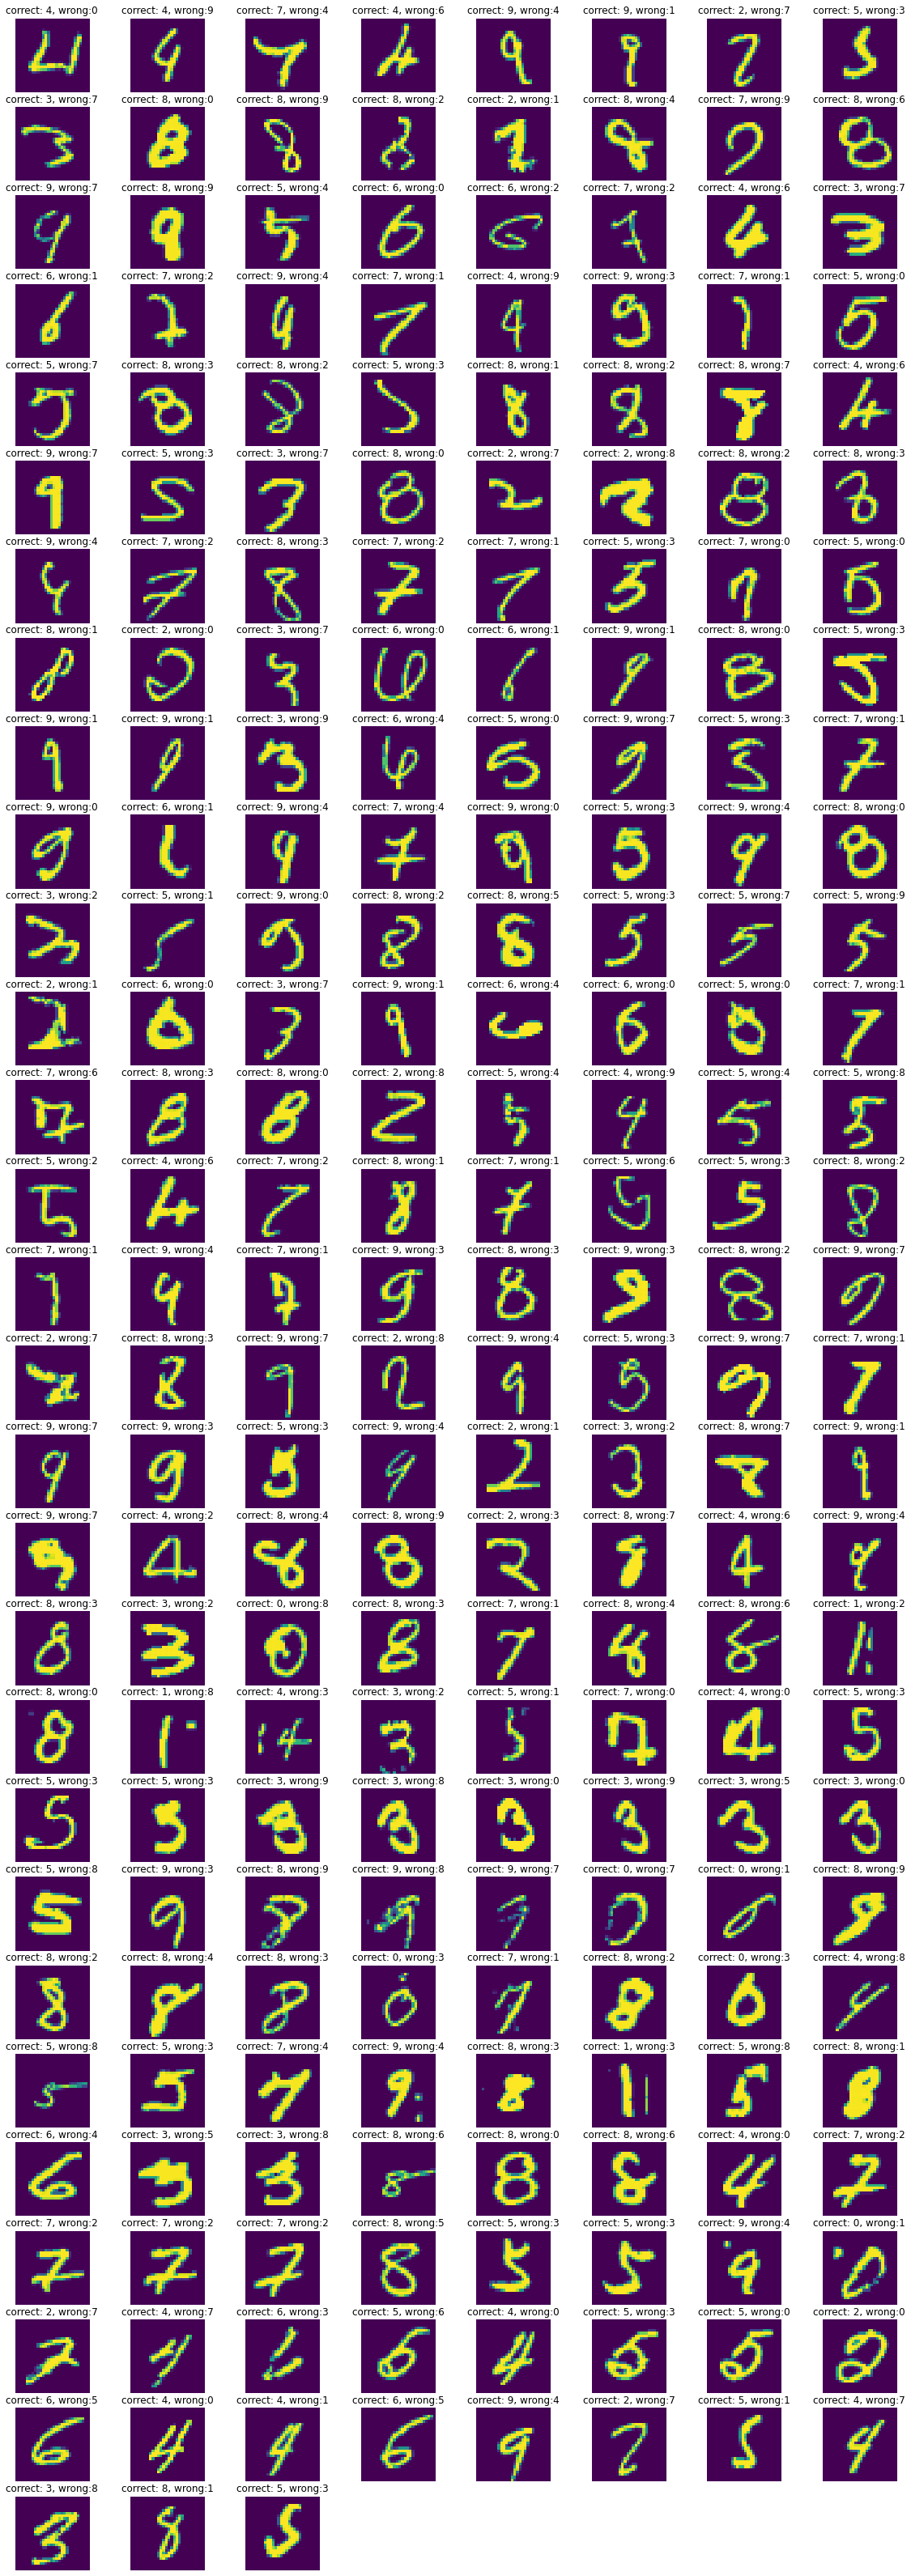

In [82]:
wrong_image('Results_5+/train_data=60000-activation_function=relu.sav', xt, yt)

In [3]:
tanh_accuracies = read_txt("Results/re_activation_function=tanh-accuracy.txt")
tanh_times = read_txt("Results/re_activation_function=tanh-time.txt")
relu_accuracies = read_txt("Results/re_activation_function=relu-accuracy.txt")
relu_times = read_txt("Results/re_activation_function=relu-time.txt")
logistic_accuracies = read_txt("Results/re_activation_function=logistic-accuracy.txt")
logistic_times = read_txt("Results/re_activation_function=logistic-time.txt")

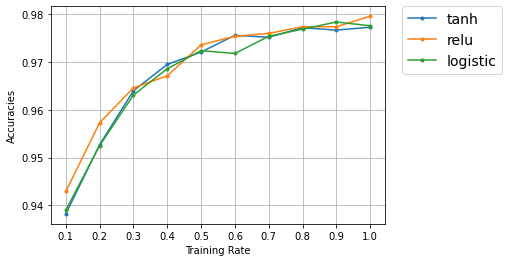

In [4]:
accuracies_list = [tanh_accuracies, relu_accuracies, logistic_accuracies]
plot_data(accuracies_list, "Accuracies")

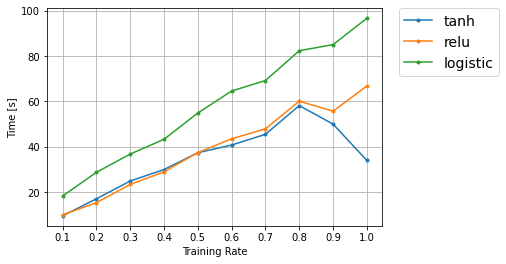

In [5]:
times_list = [tanh_times, relu_times, logistic_times]
plot_data(times_list, "Time [s]")

In [6]:
tanh_accuracies = read_txt("Results_3/re_activation_function=tanh-accuracy.txt")
tanh_times = read_txt("Results_3/re_activation_function=tanh-time.txt")
relu_accuracies = read_txt("Results_3/re_activation_function=relu-accuracy.txt")
relu_times = read_txt("Results_3/re_activation_function=relu-time.txt")
logistic_accuracies = read_txt("Results_3/re_activation_function=logistic-accuracy.txt")
logistic_times = read_txt("Results_3/re_activation_function=logistic-time.txt")

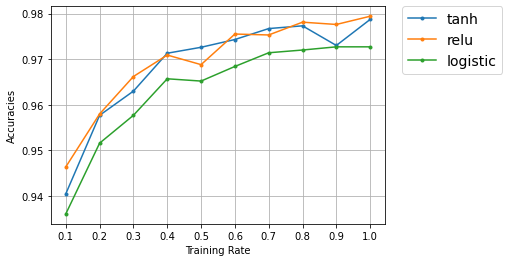

In [7]:
accuracies_list = [tanh_accuracies, relu_accuracies, logistic_accuracies]
plot_data(accuracies_list, "Accuracies")

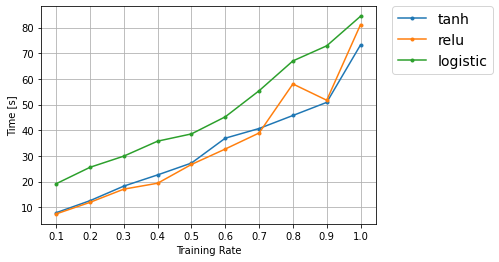

In [8]:
times_list = [tanh_times, relu_times, logistic_times]
plot_data(times_list, "Time [s]")

In [9]:
tanh_accuracies = read_txt("Results_5/re_activation_function=tanh-accuracy.txt")
tanh_times = read_txt("Results_5/re_activation_function=tanh-time.txt")
relu_accuracies = read_txt("Results_5/re_activation_function=relu-accuracy.txt")
relu_times = read_txt("Results_5/re_activation_function=relu-time.txt")
logistic_accuracies = read_txt("Results_5/re_activation_function=logistic-accuracy.txt")
logistic_times = read_txt("Results_5/re_activation_function=logistic-time.txt")

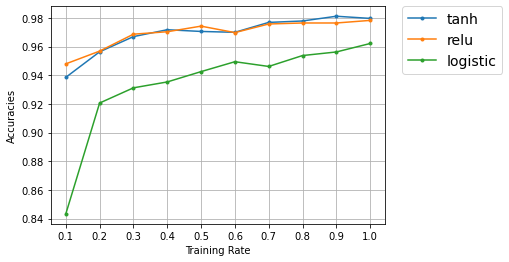

In [10]:
accuracies_list = [tanh_accuracies, relu_accuracies, logistic_accuracies]
plot_data(accuracies_list, "Accuracies")

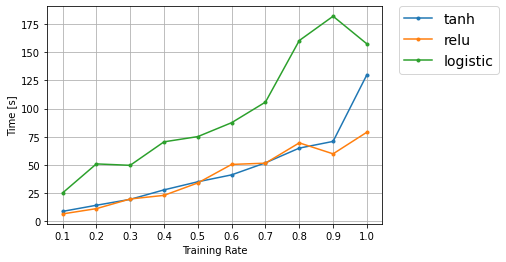

In [11]:
times_list = [tanh_times, relu_times, logistic_times]
plot_data(times_list, "Time [s]")

In [12]:
tanh_accuracies = read_txt("Results/re_activation_function=tanh-accuracy.txt")
tanh_times = read_txt("Results/re_activation_function=tanh-time.txt")
relu_accuracies = read_txt("Results/re_activation_function=relu-accuracy.txt")
relu_times = read_txt("Results/re_activation_function=relu-time.txt")
logistic_accuracies = read_txt("Results/re_activation_function=logistic-accuracy.txt")
logistic_times = read_txt("Results/re_activation_function=logistic-time.txt")

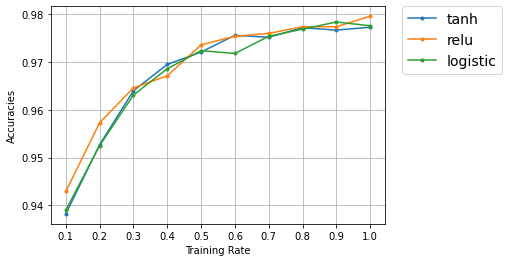

In [13]:
accuracies_list = [tanh_accuracies, relu_accuracies, logistic_accuracies]
plot_data(accuracies_list, "Accuracies")

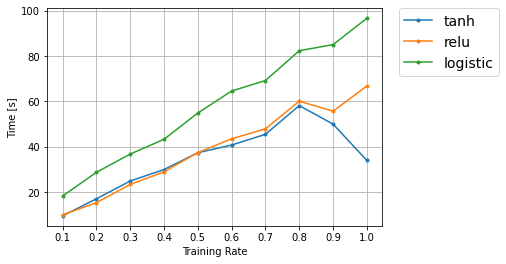

In [14]:
times_list = [tanh_times, relu_times, logistic_times]
plot_data(times_list, "Time [s]")

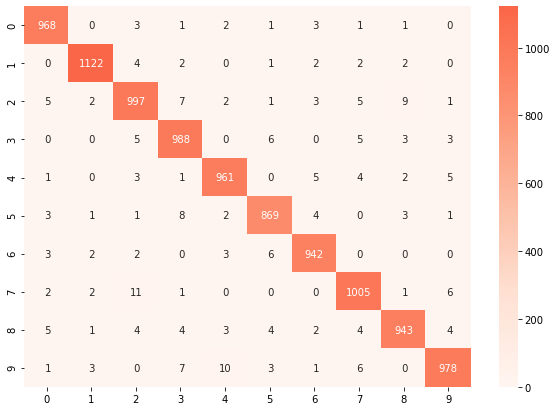

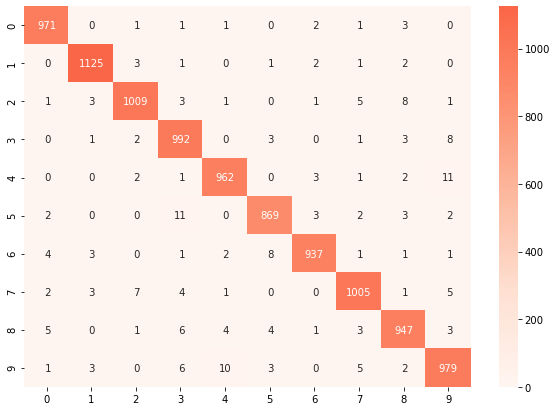

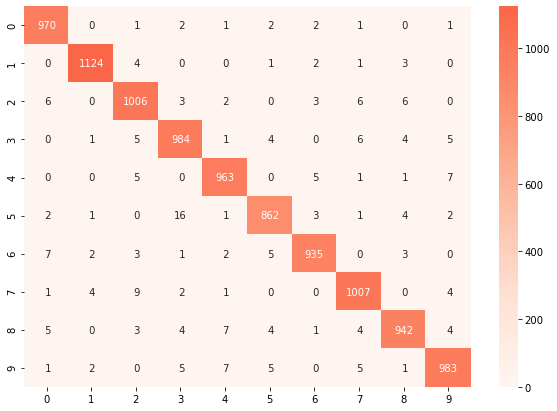

In [24]:
heat_map('Results/retrain_data=60000-activation_function=tanh.sav', xt, yt)
heat_map('Results/retrain_data=60000-activation_function=relu.sav', xt, yt)
heat_map('Results/retrain_data=60000-activation_function=logistic.sav', xt, yt)

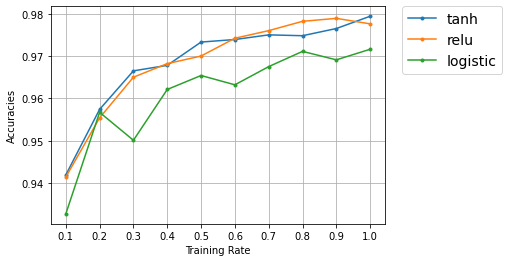

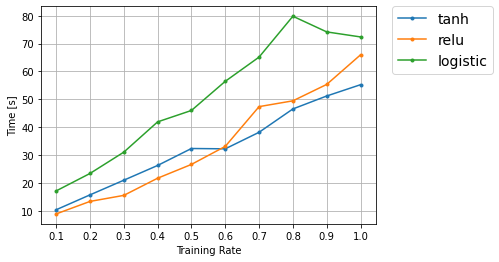

In [17]:
tanh_accuracies = read_txt("Results_3-/activation_function=tanh-accuracy.txt")
tanh_times = read_txt("Results_3-/activation_function=tanh-time.txt")
relu_accuracies = read_txt("Results_3-/activation_function=relu-accuracy.txt")
relu_times = read_txt("Results_3-/activation_function=relu-time.txt")
logistic_accuracies = read_txt("Results_3-/activation_function=logistic-accuracy.txt")
logistic_times = read_txt("Results_3-/activation_function=logistic-time.txt")
accuracies_list = [tanh_accuracies, relu_accuracies, logistic_accuracies]
times_list = [tanh_times, relu_times, logistic_times]
plot_data(accuracies_list, "Accuracies")
plot_data(times_list, "Time [s]")

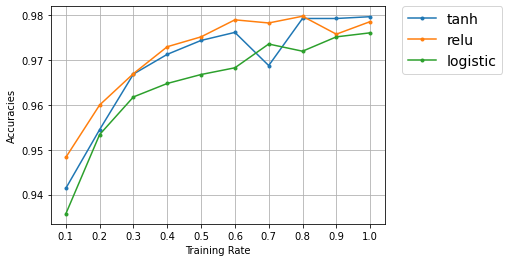

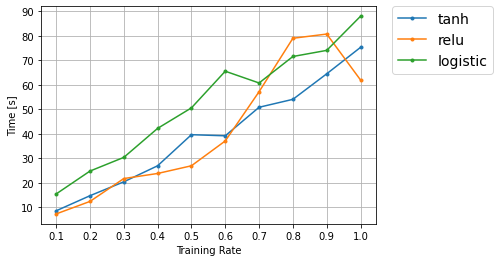

In [18]:
tanh_accuracies = read_txt("Results_3+/activation_function=tanh-accuracy.txt")
tanh_times = read_txt("Results_3+/activation_function=tanh-time.txt")
relu_accuracies = read_txt("Results_3+/activation_function=relu-accuracy.txt")
relu_times = read_txt("Results_3+/activation_function=relu-time.txt")
logistic_accuracies = read_txt("Results_3+/activation_function=logistic-accuracy.txt")
logistic_times = read_txt("Results_3+/activation_function=logistic-time.txt")
accuracies_list = [tanh_accuracies, relu_accuracies, logistic_accuracies]
times_list = [tanh_times, relu_times, logistic_times]
plot_data(accuracies_list, "Accuracies")
plot_data(times_list, "Time [s]")

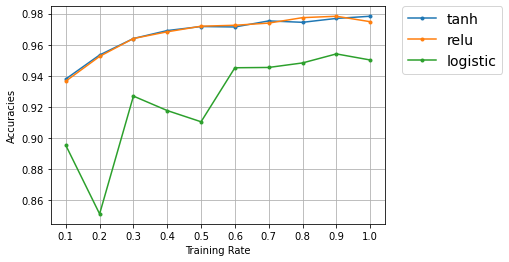

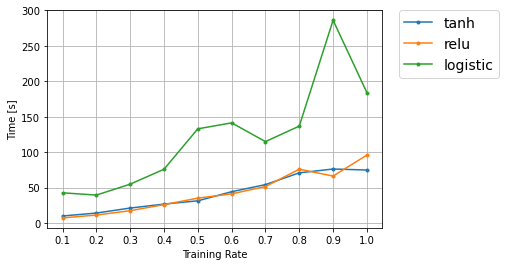

In [19]:
tanh_accuracies = read_txt("Results_5-/activation_function=tanh-accuracy.txt")
tanh_times = read_txt("Results_5-/activation_function=tanh-time.txt")
relu_accuracies = read_txt("Results_5-/activation_function=relu-accuracy.txt")
relu_times = read_txt("Results_5-/activation_function=relu-time.txt")
logistic_accuracies = read_txt("Results_5-/activation_function=logistic-accuracy.txt")
logistic_times = read_txt("Results_5-/activation_function=logistic-time.txt")
accuracies_list = [tanh_accuracies, relu_accuracies, logistic_accuracies]
times_list = [tanh_times, relu_times, logistic_times]
plot_data(accuracies_list, "Accuracies")
plot_data(times_list, "Time [s]")

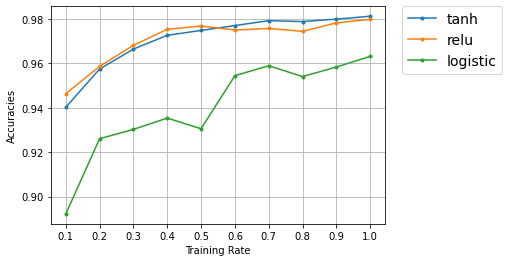

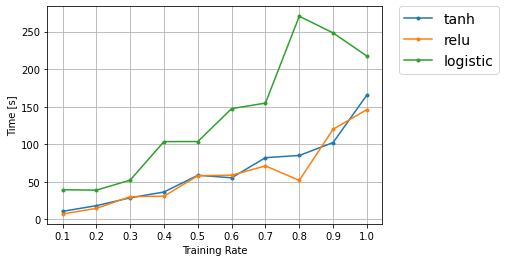

In [20]:
tanh_accuracies = read_txt("Results_5+/activation_function=tanh-accuracy.txt")
tanh_times = read_txt("Results_5+/activation_function=tanh-time.txt")
relu_accuracies = read_txt("Results_5+/activation_function=relu-accuracy.txt")
relu_times = read_txt("Results_5+/activation_function=relu-time.txt")
logistic_accuracies = read_txt("Results_5+/activation_function=logistic-accuracy.txt")
logistic_times = read_txt("Results_5+/activation_function=logistic-time.txt")
accuracies_list = [tanh_accuracies, relu_accuracies, logistic_accuracies]
times_list = [tanh_times, relu_times, logistic_times]
plot_data(accuracies_list, "Accuracies")
plot_data(times_list, "Time [s]")

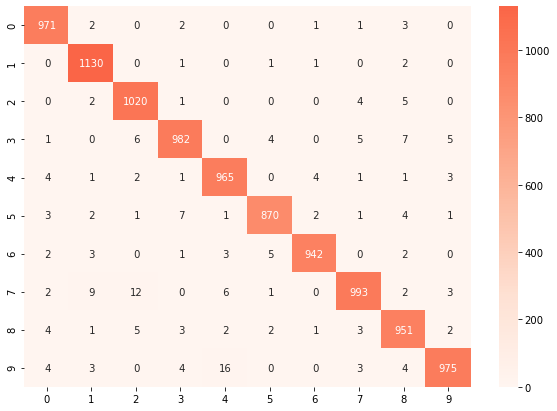

In [33]:
heat_map('Results_5+/train_data=60000-activation_function=relu.sav', xt, yt)

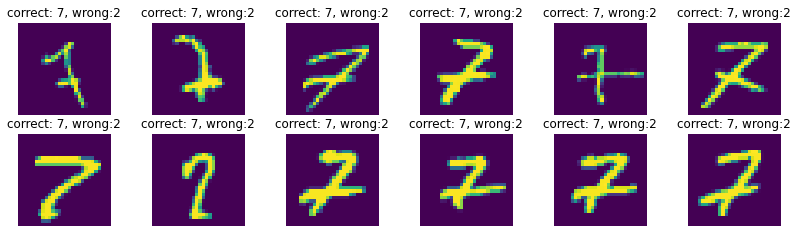

In [111]:
# MNISTデータの読み込み
(x, y), (xt, yt) = load_data()

x_train = copy.deepcopy(x)
x_test = copy.deepcopy(xt)

# 画像データの正規化
x_train = x.reshape(len(x_train), 28 * 28)
x_test = xt.reshape(len(x_test), 28 * 28)
x = data_reshape(x)
xt = data_reshape(xt)

model = model_load('Results_5+/train_data=60000-activation_function=relu.sav')
predict = model.predict(xt)
predict = list(predict)

wrong_list = [] # 間違えた画像のインデックス番号
wrong_value = []
correct_value = []
for i in range(len(predict)):
    if predict[i] != yt[i]:
        wrong_list.append(i)
        wrong_value.append(predict[i])
        correct_value.append(yt[i])

def wrong_data_pickup(x_test, wrong_list, wrong_value, correct_value, search_number):
    j = 0
    plt.figure(figsize=(14,20))
    for i, num in enumerate(wrong_value):
        if num == 2 and correct_value[i] == 7:
            ax = plt.subplot(10, 6, j + 1)
            ax.set_axis_off()
            ax.set_title( "correct: {}, wrong:{}".format(correct_value[i], wrong_value[i]))
            plt.imshow(x_test[wrong_list[i]].reshape(28, 28).astype("uint8"))
            j += 1
    plt.show()
wrong_data_pickup(x_test, wrong_list, wrong_value, correct_value, 8)